In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats

In [2]:
data = pd.read_csv('../bank/bank-full.csv', delimiter = ';')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Check if the data set contains any null values - Nothing found!
data[data.isnull().any(axis=1)].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Knowing the categorical variables

In [7]:
print("Jobs : ", data.job.unique())
print("Marital : ", data.marital.unique())
print("Education : ", data.education.unique())
print("Default : ", data.default.unique())
print("Housing : ", data.housing.unique())
print("Loans : ", data.loan.unique())
print("Contact : ", data.contact.unique())
print("Month : ", data.month.unique())
print("Poutcome : ", data.poutcome.unique())
print("y : ", data.y.unique())

Jobs :  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital :  ['married' 'single' 'divorced']
Education :  ['tertiary' 'secondary' 'unknown' 'primary']
Default :  ['no' 'yes']
Housing :  ['yes' 'no']
Loans :  ['no' 'yes']
Contact :  ['unknown' 'cellular' 'telephone']
Month :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Poutcome :  ['unknown' 'failure' 'other' 'success']
y :  ['no' 'yes']


## Knowing the numerical variables

## AGE

In [8]:
#Trying to find some strange values or null values
print('Min age: ', data['age'].max())
print('Max age: ', data['age'].min())
print('Null Values: ', data['age'].isnull().any())

Min age:  95
Max age:  18
Null Values:  False


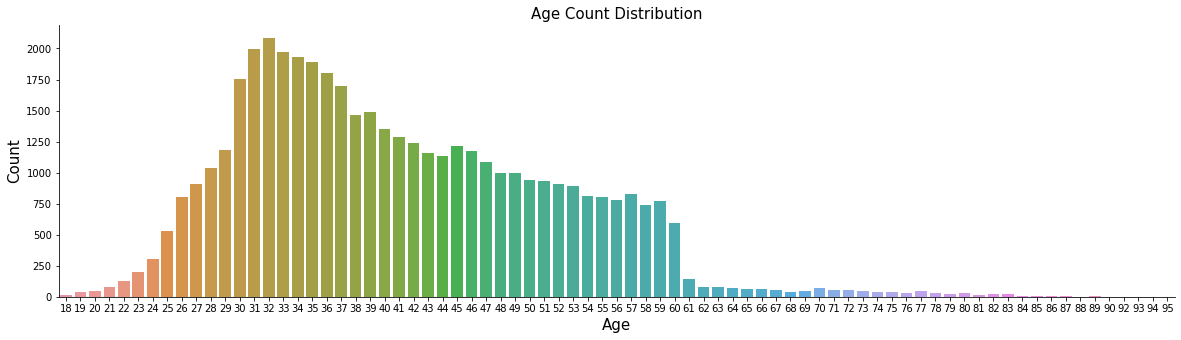

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'age', data = data)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

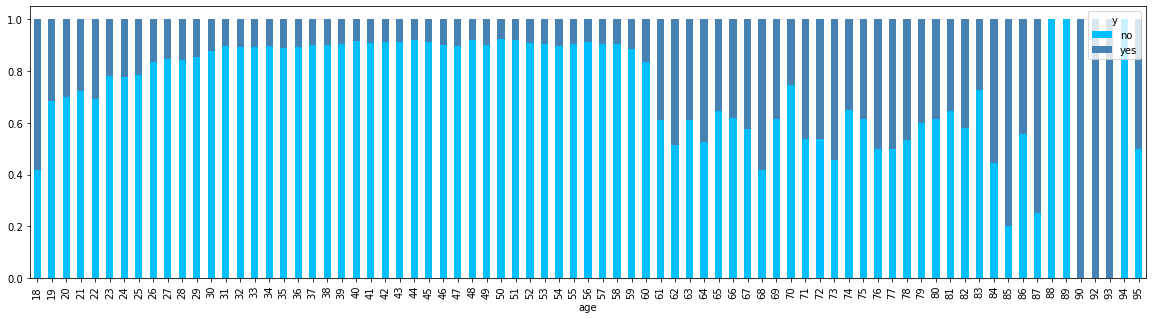

In [125]:
_ = pd.crosstab(data.age, data.y)
_.div(_.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(20, 5))
plt.show()

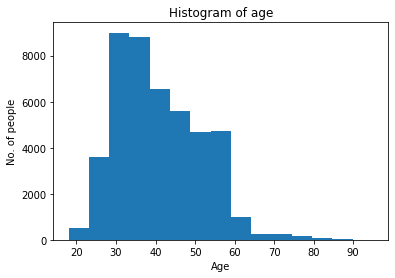

In [10]:
#Histogram of age parameter
_ = plt.hist(data.age,bins=15)
_ = plt.xlabel('Age')
_ = plt.ylabel('No. of people')
_ = plt.title('Histogram of age')
plt.show()

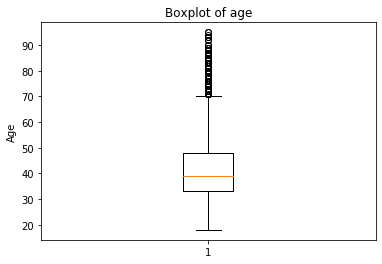

In [11]:
#Boxplot of age
_ = plt.boxplot(data.age)
_ = plt.ylabel('Age')
_ = plt.title('Boxplot of age')
plt.show()

In [12]:
print('1º Quartile: ', data['age'].quantile(q = 0.25))
print('2º Quartile: ', data['age'].quantile(q = 0.50))
print('3º Quartile: ', data['age'].quantile(q = 0.75))
print('4º Quartile: ', data['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', data['age'].quantile(q = 0.75) + 
                      1.5*(data['age'].quantile(q = 0.75) - data['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  33.0
2º Quartile:  39.0
3º Quartile:  48.0
4º Quartile:  95.0
Ages above:  70.5 are outliers


In [13]:
print('Numerber of outliers: ', data[data['age'] > 70.5]['age'].count())
print('Number of clients: ', len(data))
#Outliers in %
print('Outliers are:', round(data[data['age'] > 70.5]['age'].count()*100/len(data),2), '%')

Numerber of outliers:  487
Number of clients:  45211
Outliers are: 1.08 %


In [14]:
# Calculating some values to evaluate this variable
print('MEAN:', data['age'].mean())
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', data['age'].std())

MEAN: 40.93621021432837
STD : 10.618762040975431


In [15]:
age_yes = data.age[data.y == 'yes']
age_no = data.age[data.y == 'no']

print("Category 1 : Customers who subscribed to term deposit\nCategory 2 : Customers who did not subscribe to term deposit\n")
print("Null hypothesis : The mean age of Category 1 is equal to the mean age of Category 2")
print("Alternate hypothesis : The mean age of category 1 is not equal to the mean age of category 2 (i.e. they are close to each other by chance)")

Category 1 : Customers who subscribed to term deposit
Category 2 : Customers who did not subscribe to term deposit

Null hypothesis : The mean age of Category 1 is equal to the mean age of Category 2
Alternate hypothesis : The mean age of category 1 is not equal to the mean age of category 2 (i.e. they are close to each other by chance)


In [16]:
mean_age_yes = np.mean(age_yes)
mean_age_no = np.mean(age_no)
std_age_yes = np.std(age_yes, ddof=1)
std_age_no = np.std(age_no, ddof=1)
length_age_yes = len(age_yes)
length_age_no = len(age_no)

#Calculating the 95% confidence interval for Category 1 and Category 2

print("Mean age for customers who subscribed for term deposit :", mean_age_yes)

critical_value_yes = t.ppf(0.975, df = length_age_yes - 1)
m_o_err_yes =  critical_value_yes * (std_age_yes/ np.sqrt(length_age_yes))
confidence_intrvl_yes = [mean_age_yes - m_o_err_yes, mean_age_yes + m_o_err_yes]
print("95% Confidence interval for mean age of customers who subscribed for term deposit : \n", confidence_intrvl_yes)


print("\nMean age for customers who did not subscribe for term deposit :", mean_age_no)

critical_value_no = t.ppf(0.975, df = length_age_no - 1)
m_o_err_no =  critical_value_no * (std_age_no/ np.sqrt(length_age_no))
confidence_intrvl_no = [mean_age_no - m_o_err_no, mean_age_no + m_o_err_no]
print("95% Confidence interval for mean age of customers who didn't subscribe for term deposit : \n", confidence_intrvl_no)

#Using scipy.stats, function to perform a t-test on two independent samples
t_test, p_value = scipy.stats.ttest_ind(age_yes, age_no, equal_var=False)
print("\nT-test statistic : ",t_test, "\nP-value : ", p_value)

print("\nSince the p-value is very small, Null hypothesis is rejected, Alternate hypothesis holds true")
print("Alternate hypothesis : The mean age of category 1 is not equal to the mean age of category 2 (i.e. they are close by chance)")

Mean age for customers who subscribed for term deposit : 41.670069956513515
95% Confidence interval for mean age of customers who subscribed for term deposit : 
 [41.3062193392251, 42.03392057380193]

Mean age for customers who did not subscribe for term deposit : 40.83898602274435
95% Confidence interval for mean age of customers who didn't subscribe for term deposit : 
 [40.73919540015151, 40.93877664533719]

T-test statistic :  4.3183175911673475 
P-value :  1.597104674376039e-05

Since the p-value is very small, Null hypothesis is rejected, Alternate hypothesis holds true
Alternate hypothesis : The mean age of category 1 is not equal to the mean age of category 2 (i.e. they are close by chance)


## Job

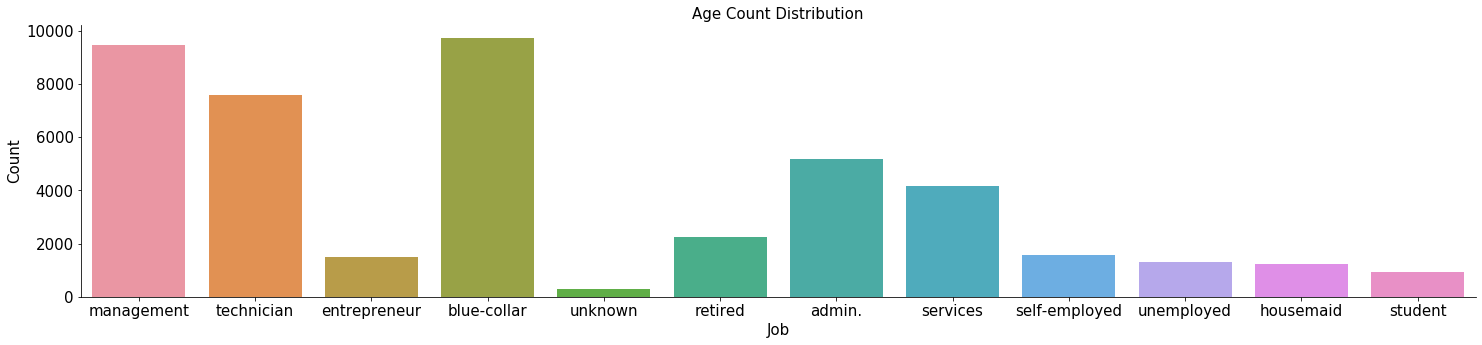

In [17]:
# What kind of jobs do the clients of this bank have
fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
sns.countplot(x = 'job', data = data)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

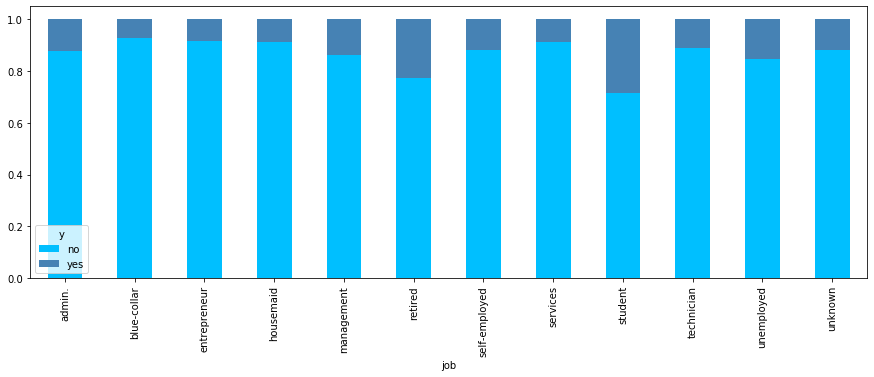

In [18]:
_ = pd.crosstab(data.job, data.y)
_.div(_.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

## Marital

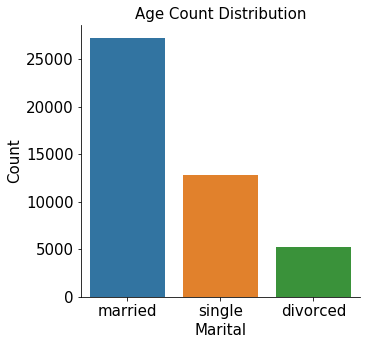

In [19]:
# What kind of 'marital clients' this bank have
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.countplot(x = 'marital', data = data)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

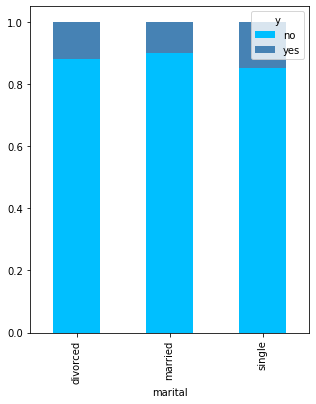

In [20]:
_ = pd.crosstab(data.marital, data.y)
_.div(_.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(5, 6))
plt.show()

## Education

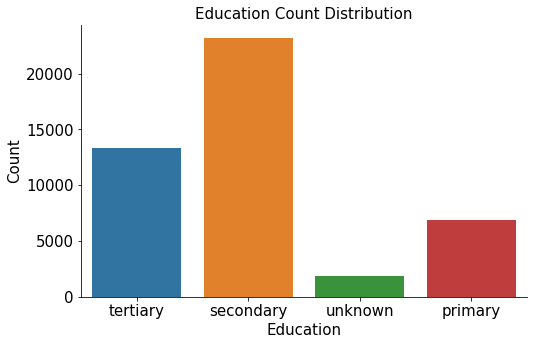

In [21]:
# What kind of 'education clients this bank have
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.countplot(x = 'education', data = data)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

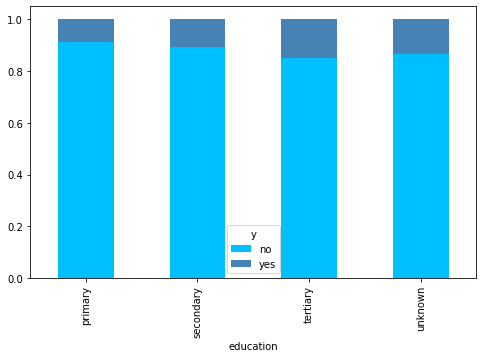

In [22]:
_ = pd.crosstab(data.education, data.y)
_.div(_.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(8, 5))
plt.show()

## DEFAULT, HOUSING, LOAN

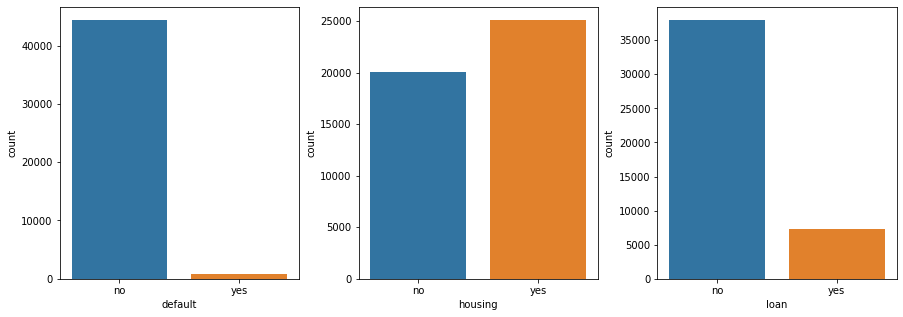

In [23]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
sns.countplot(x = 'default', data = data, ax = ax1, order = ['no', 'yes'])

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = data, ax = ax2, order = ['no', 'yes'])

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = data, ax = ax3, order = ['no', 'yes'])

plt.subplots_adjust(wspace=0.25)

In [24]:
data.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [25]:
data.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [26]:
data.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

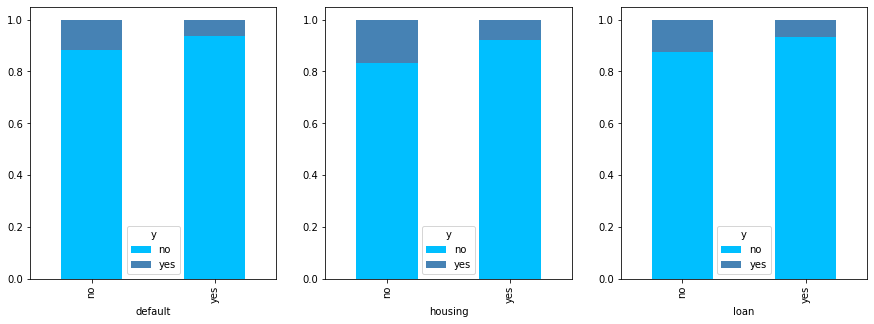

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
_ = pd.crosstab(data.default, data.y)
_.div(_.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, ax =ax1)

_ = pd.crosstab(data.housing, data.y)
_.div(_.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, ax = ax2)

_ = pd.crosstab(data.loan, data.y)
_.div(_.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, ax = ax3)
plt.show()

## Balance

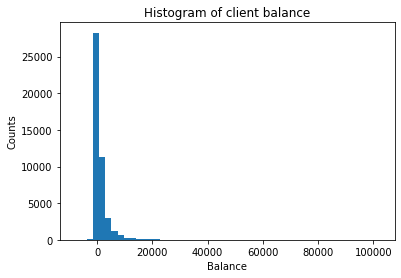

In [28]:
_ = plt.hist(data.balance,bins=50)
_ = plt.xlabel('Balance')
_ = plt.ylabel('Counts')
_ = plt.title('Histogram of client balance')
plt.show()

In [29]:
data.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

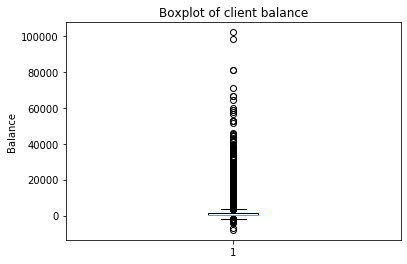

In [30]:
_ = plt.boxplot(data.balance)
_ = plt.ylabel('Balance')
_ = plt.title('Boxplot of client balance')
plt.show()

In [31]:
y_for_balance_less_than_zero = data.y[data.balance <= 0 ]
print(y_for_balance_less_than_zero.value_counts())
print("No. of clients who have zero or negative balance :", len(y_for_balance_less_than_zero))

no     6778
yes     502
Name: y, dtype: int64
No. of clients who have zero or negative balance : 7280


### Hypothesis testing on balance

### Hypothesis 1

In [32]:
print('Category 1 : Balance of customers who subscribed for a term deposit')
print('Category 2 : Balance of customers who did not subscribe for a term deposit\n')

Category 1 : Balance of customers who subscribed for a term deposit
Category 2 : Balance of customers who did not subscribe for a term deposit



In [33]:
print('Null hypothesis : Balance of customers who subscribed for term deposit does not differ from those who did not.\n(Category 1 does not differ from Category 2)')
print('Alternate hypothesis : Balance of customers who subscribed for term deposit differ from those who did not.\n(Category 1 is different from Category 2)')


Null hypothesis : Balance of customers who subscribed for term deposit does not differ from those who did not.
(Category 1 does not differ from Category 2)
Alternate hypothesis : Balance of customers who subscribed for term deposit differ from those who did not.
(Category 1 is different from Category 2)


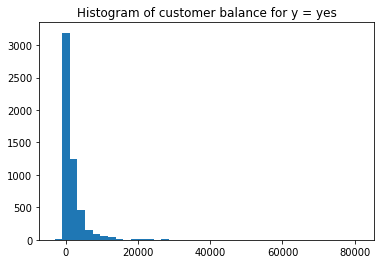

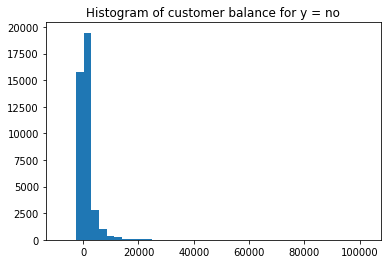

In [34]:
balance_yes = data.balance[data.y == 'yes']
balance_no = data.balance[data.y == 'no']

plt.hist(balance_yes, bins =40)
plt.title('Histogram of customer balance for y = yes')
plt.show()

plt.hist(balance_no, bins = 40)
plt.title('Histogram of customer balance for y = no')
plt.show()


In [35]:
mean_balance_yes = np.mean(balance_yes)
mean_balance_no = np.mean(balance_no)
std_balance_yes = np.std(balance_yes, ddof=1)
std_balance_no = np.std(balance_no, ddof=1)
length_balance_yes = len(balance_yes)
length_balance_no = len(balance_no)

print(mean_balance_yes, std_balance_yes, length_balance_yes)
print(mean_balance_no, std_balance_no, length_balance_no)

1804.2679145396105 3501.104776507358 5289
1303.7149691899203 2974.1954729633367 39922


In [104]:
#Calculating the 95% confidence interval for Category 1 and Category 2

print("Mean balance for customers who subscribed to term deposit :", mean_balance_yes)

critical_value_yes = t.ppf(0.975, df = length_balance_yes - 1)
m_o_err_yes =  critical_value_yes * (std_balance_yes/ np.sqrt(length_balance_yes))
confidence_intrvl_yes = [mean_balance_yes - m_o_err_yes, mean_balance_yes + m_o_err_yes]
print("95% Confidence interval for mean balance of customers who subscribed to term deposit : \n", confidence_intrvl_yes)


print("\nMean balance for customers who did not subscribe to term deposit :", mean_balance_no)

critical_value_no = t.ppf(0.975, df = length_balance_no - 1)
m_o_err_no =  critical_value_no * (std_balance_no/ np.sqrt(length_balance_no))
confidence_intrvl_no = [mean_balance_no - m_o_err_no, mean_balance_no + m_o_err_no]
print("95% Confidence interval for mean balance of customers who didn't subscribe to term deposit : \n", confidence_intrvl_no)

#Using scipy.stats, function to perform a t-test on two independent samples
t_test, p_value = scipy.stats.ttest_ind(balance_yes, balance_no, equal_var=False)
print("\nT-test statistic : ",t_test, "\nP-value : ", p_value)

print("\nSince the p-value is very small, Null hypothesis is rejected, Alternate hypothesis holds true")
print("\nAlternate hypothesis : Balance of customers who subscribed to term deposit differ from customers who did not \nsubscribe to term deposit")
print("The mean for customers with y='yes' is 1804$ compared to 1303$ with y='no'")

Mean balance for customers who subscribed to term deposit : 1804.2679145396105
95% Confidence interval for mean balance of customers who subscribed to term deposit : 
 [1709.8909876578794, 1898.6448414213417]

Mean balance for customers who did not subscribe to term deposit : 1303.7149691899203
95% Confidence interval for mean balance of customers who didn't subscribe to term deposit : 
 [1274.5390450112463, 1332.8908933685943]

T-test statistic :  9.933545392962255 
P-value :  4.3837327771001536e-23

Since the p-value is very small, Null hypothesis is rejected, Alternate hypothesis holds true

Alternate hypothesis : Balance of customers who subscribed to term deposit differ from customers who did not 
subscribe to term deposit
The mean for customers with y='yes' is 1804$ compared to 1303$ with y='no'


### Analysing balance of customers according to their balance

In [37]:
zero_or_negative_balance = data[['balance', 'y']][data.balance <= 0]
zero_or_negative_balance_yes = zero_or_negative_balance.balance[zero_or_negative_balance.y == 'yes']
zero_or_negative_balance_no = zero_or_negative_balance.balance[zero_or_negative_balance.y == 'no']

zero_balance = zero_or_negative_balance[zero_or_negative_balance.balance == 0]
zero_balance_yes = zero_balance.balance[zero_balance.y == 'yes']
zero_balance_no = zero_balance.balance[zero_balance.y == 'no']

negative_balance = data[['balance', 'y']][data.balance < 0]
negative_balance_yes = negative_balance.balance[negative_balance.y == 'yes']
negative_balance_no = negative_balance.balance[negative_balance.y == 'no']

balance_greater_than_zero = data[['balance', 'y']][data.balance > 0]
balance_greater_than_zero_yes = balance_greater_than_zero.balance[balance_greater_than_zero.y == 'yes']
balance_greater_than_zero_no = balance_greater_than_zero.balance[balance_greater_than_zero.y == 'no']


In [38]:
len(zero_or_negative_balance), len(zero_or_negative_balance_yes), len(zero_or_negative_balance_no), len(zero_or_negative_balance_yes)/ len(zero_or_negative_balance)

(7280, 502, 6778, 0.06895604395604396)

In [39]:
len(zero_balance), len(zero_balance_yes), len(zero_balance_no), len(zero_balance_yes)/ len(zero_balance)

(3514, 292, 3222, 0.08309618668184406)

In [40]:
len(negative_balance), len(negative_balance_yes), len(negative_balance_no), len(negative_balance_yes)/len(negative_balance)

(3766, 210, 3556, 0.055762081784386616)

In [41]:
len(balance_greater_than_zero), len(balance_greater_than_zero_yes), len(balance_greater_than_zero_no), len(balance_greater_than_zero_yes)/ len(balance_greater_than_zero)

(37931, 4787, 33144, 0.12620284200258364)

### Hypothesis 2

In [ ]:
# a = customers with balance = (zero or negative) who subscribed for a term deposit
# b = customers with balance greater than zero who subscribed for a term deposit

a = zero_or_negative_balance_yes
b = balance_greater_than_zero_yes

print("Null hypothesis : Balance has no effect on customers subscribing for a Term Deposit")
print("Alternate hypothesis : Balance plays a role in customers subscribing for a Term Deposit")

In [ ]:
plt.hist(a, bins =40)
plt.title('Histogram of Balance for A')
plt.show()

plt.hist(-1 * a, bins =40)
plt.title('Histogram of Balance for A after reversing signs')
plt.show()

plt.hist(b, bins = 40)
plt.title('Histogram of Balance for B')
plt.show()

In [ ]:
#for the sake of the hypothesis, reversing the -ve of a to +ve.
a = -1 * a

mean_a = np.mean(a)
mean_b = np.mean(b)
std_a = np.std(a, ddof=1)
std_b = np.std(b, ddof=1)
length_a = len(a)
length_b = len(b)

mean_a, std_a, length_a

In [ ]:
mean_b, std_b, length_b

In [ ]:
print("Category 1: a = customers with balance = (zero or negative) who subscribed to term deposit")
print("Category 2: b = customers with balance greater than zero who subscribed to term deposit\n")

#Calculating the 95% confidence interval for Category 1 and Category 2

print("Mean balance for Category 1 : ", mean_a)

critical_value_yes = t.ppf(0.975, df = length_a - 1)
m_o_err_yes =  critical_value_yes * (std_a/ np.sqrt(length_a))
confidence_intrvl_yes = [mean_a - m_o_err_yes, mean_a + m_o_err_yes]
print("95% Confidence interval for mean balance for Category 1 : \n", confidence_intrvl_yes)


print("\nMean balance for Category 2 :", mean_balance_no)

critical_value_no = t.ppf(0.975, df = length_b - 1)
m_o_err_no =  critical_value_no * (std_b/ np.sqrt(length_b))
confidence_intrvl_no = [mean_b - m_o_err_no, mean_b + m_o_err_no]
print("95% Confidence interval for mean balance for Category 2 : \n", confidence_intrvl_no)

#Using scipy.stats, function to perform a t-test on two independent samples
t_test, p_value = scipy.stats.ttest_ind(a, b, equal_var=False)
print("\nT-test statistic : ",t_test, "\nP-value : ", p_value)

print("\nSince the p-value is extremely small, Null hypothesis is rejected, Alternate hypothesis holds true")
print("Alternate hypothesis : Balance plays a role in customers subscribing to Term Deposit")

## Contact

In [47]:
# contact communication type 
data.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

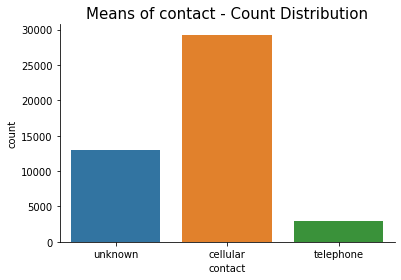

In [48]:
sns.countplot(x = 'contact', data = data)
plt.title('Means of contact - Count Distribution', fontsize=15)
plt.tick_params(labelsize=10)
sns.despine()

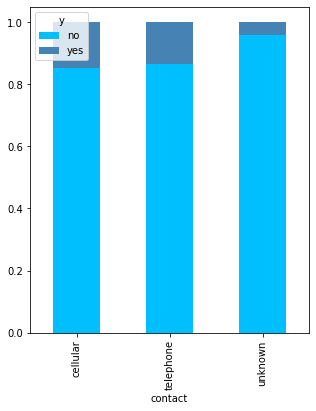

In [49]:
_ = pd.crosstab(data.contact, data.y)
_.div(_.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(5, 6))
plt.show()

__A__ This data might not be important because everyone has been contacted regardless of how.

## Day

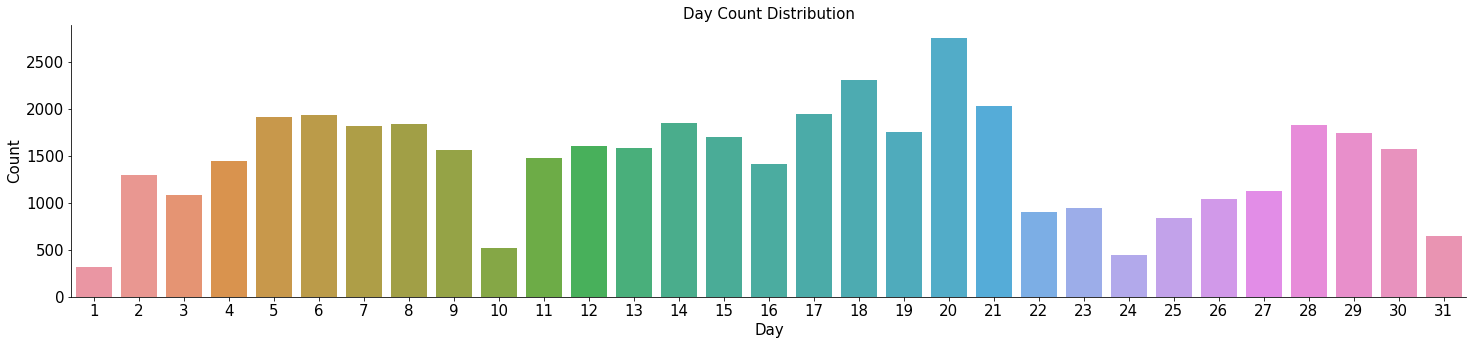

In [50]:
# day: last contact day of the month
fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
sns.countplot(x = 'day', data = data)
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Day Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

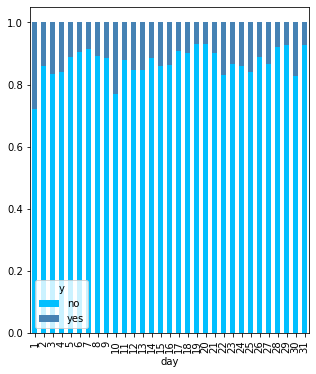

In [51]:
_ = pd.crosstab(data.day, data.y)
_.div(_.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(5, 6))
plt.show()

## Month

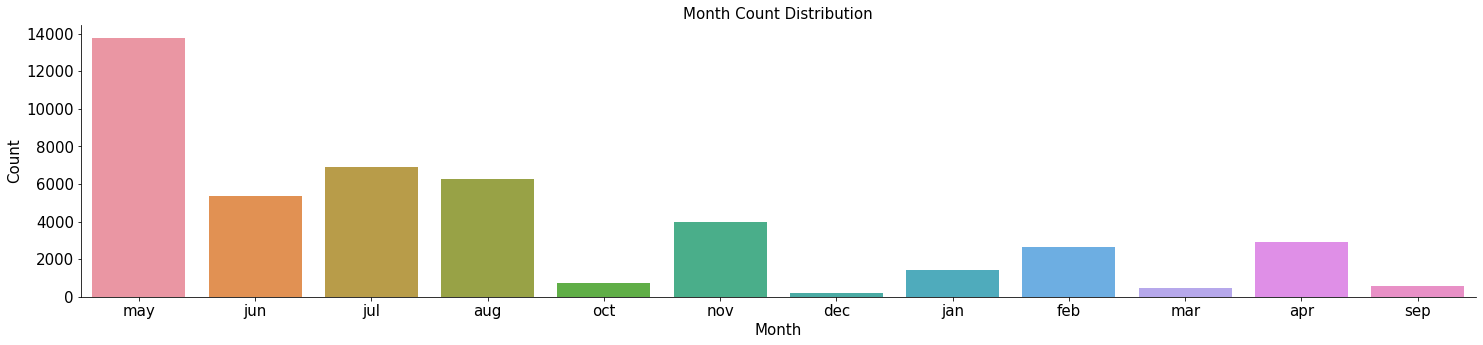

In [52]:
# last contact month of year 
fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
sns.countplot(x = 'month', data = data)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Month Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

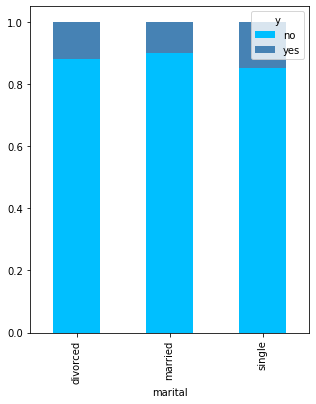

In [53]:
_ = pd.crosstab(data.marital, data.y)
_.div(_.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(5, 6))
plt.show()

## Duration

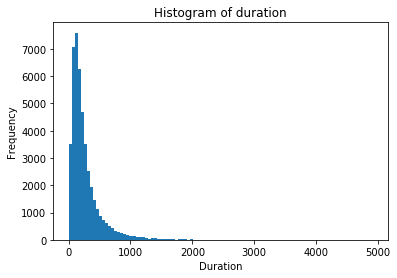

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [54]:
# last contact duration, in seconds
#histogram of duration of phone call
_ = plt.hist((data.duration),bins=100)
_ = plt.xlabel('Duration')
_ = plt.ylabel('Frequency')
_ = plt.title('Histogram of duration')
plt.show()
data.duration.describe()

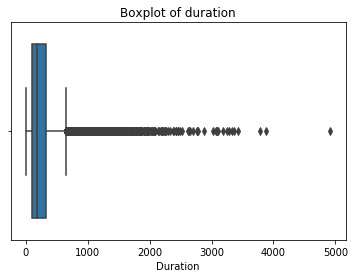

In [55]:
#Boxplot of duration
_ = sns.boxplot(data.duration)
_ = plt.xlabel('Duration')
_ = plt.title('Boxplot of duration')
plt.show()

# The boxplot shows that there are outliers. But the outliers are left as such for further analysis.

In [56]:
print('Mean: ', data.duration.mean())

Mean:  258.1630797814691


### Hypothesis testing - duration

In [96]:
print("Null hypothesis: Duration of phonecall is irrelevant to whether the customer will subscribe for a term deposit or not")
print("Alternate hypothesis: Duration plays an important role in whether the customer will subscribe for a term deposit or not")


Null hypothesis: Duration of phonecall is irrelevant to whether the customer will subscribe for a term deposit or not
Alternate hypothesis: Duration plays an important role in whether the customer will subscribe for a term deposit or not


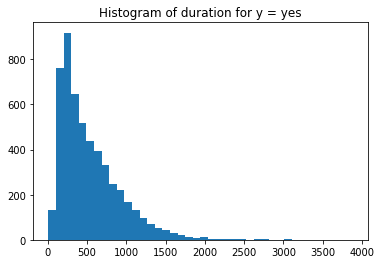

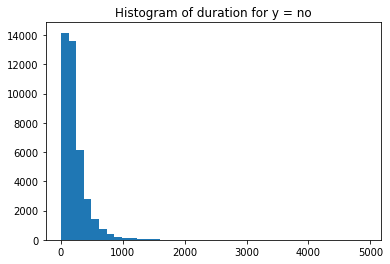

In [91]:
duration_yes = data.duration[data.y == 'yes']
duration_no = data.duration[data.y == 'no']

plt.hist(duration_yes, bins =40)
plt.title('Histogram of duration for y = yes')
plt.show()

plt.hist(duration_no, bins = 40)
plt.title('Histogram of duration for y = no')
plt.show()


In [94]:
mean_duration_yes = np.mean(duration_yes)
mean_duration_no = np.mean(duration_no)
std_duration_yes = np.std(duration_yes, ddof=1)
std_duration_no = np.std(duration_no, ddof=1)
length_duration_yes = len(duration_yes)
length_duration_no = len(duration_no)

print(mean_duration_yes, std_duration_yes, length_duration_yes)
print(mean_duration_no, std_duration_no, length_duration_no)

537.2945736434109 392.52526226417103 5289
221.18280647262162 207.38323718641033 39922


In [100]:
#Calculating the 95% confidence interval for Category 1 and Category 2

print("Mean duration for customers who subscribed to term deposit :", mean_duration_yes)

critical_value_yes = t.ppf(0.975, df = length_duration_yes - 1)
m_o_err_yes =  critical_value_yes * (std_duration_yes/ np.sqrt(length_duration_yes))
confidence_intrvl_yes = [mean_duration_yes - m_o_err_yes, mean_duration_yes + m_o_err_yes]
print("95% Confidence interval for mean duration for customers who subscribed to term deposit : \n", confidence_intrvl_yes)


print("\nMean duration for customers who did not subscribe to term deposit :", mean_duration_no)

critical_value_no = t.ppf(0.975, df = length_duration_no - 1)
m_o_err_no =  critical_value_no * (std_duration_no/ np.sqrt(length_duration_no))
confidence_intrvl_no = [mean_duration_no - m_o_err_no, mean_duration_no + m_o_err_no]
print("95% Confidence interval for mean duration for customers who didn't subscribe to term deposit : \n", confidence_intrvl_no)

#Using scipy.stats, function to perform a t-test on two independent samples
t_test, p_value = scipy.stats.ttest_ind(duration_yes, duration_no, equal_var=False)
print("\nT-test statistic : ",t_test, "\nP-value : ", p_value)

print("\nSince the p-value is 0, Null hypothesis is rejected, Alternate hypothesis holds true")
print("\nAlternate hypothesis: Duration of phonecall plays an important role in whether the customer will subscribe for term \ndeposit or not")


Mean duration for customers who subscribed to term deposit : 537.2945736434109
95% Confidence interval for mean duration for customers who subscribed to term deposit : 
 [526.7135341313933, 547.8756131554285]

Mean duration for customers who did not subscribe to term deposit : 221.18280647262162
95% Confidence interval for mean duration for customers who didn't subscribe to term deposit : 
 [219.14844200025217, 223.21717094499107]

T-test statistic :  57.51412654456789 
P-value :  0.0

Since the p-value is 0, Null hypothesis is rejected, Alternate hypothesis holds true

Alternate hypothesis: Duration of phonecall plays an important role in whether the customer will subscribe for term 
deposit or not


## Campaign

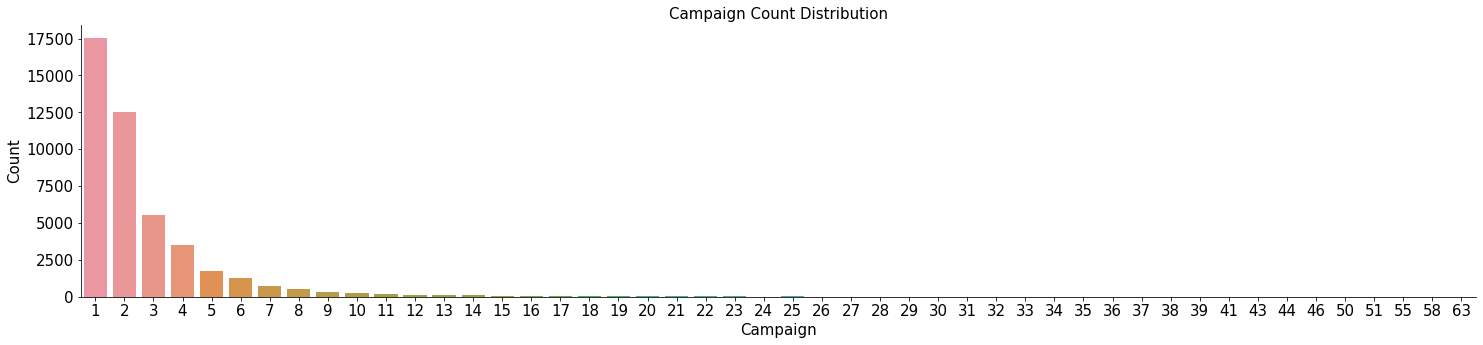

In [57]:
# Number of contacts performed during this campaign and for this client 
fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
sns.countplot(x = 'campaign', data = data)
ax.set_xlabel('Campaign', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Campaign Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [58]:
data.campaign.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

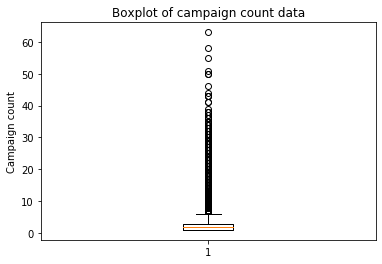

In [59]:
_ = plt.boxplot('campaign', data = data)
_ = plt.ylabel('Campaign count')
_ = plt.title('Boxplot of campaign count data')
plt.show()

In [60]:
print('1º Quartile: ', data.campaign.quantile(q = 0.25))
print('2º Quartile: ', data.campaign.quantile(q = 0.50))
print('3º Quartile: ', data.campaign.quantile(q = 0.75))
print('4º Quartile: ', data.campaign.quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', data.campaign.quantile(q = 0.75) + 
                      1.5*(data.campaign.quantile(q = 0.75) - data.campaign.quantile(q = 0.25)), 'are outliers')

1º Quartile:  1.0
2º Quartile:  2.0
3º Quartile:  3.0
4º Quartile:  63.0
Ages above:  6.0 are outliers


In [61]:
print('Numerber of outliers: ', data[data.campaign > 6.0]['campaign'].count())
print('Number of clients: ', len(data))
#Outliers in %
print('Outliers are:', round(data[data.campaign > 6.0]['campaign'].count()*100/len(data),2), '%')

Numerber of outliers:  3064
Number of clients:  45211
Outliers are: 6.78 %


In [62]:
# To check if the output 'y' is yes for any outliers of campaign column
data[data.campaign > 6.0]['y'].value_counts()

no     2903
yes     161
Name: y, dtype: int64

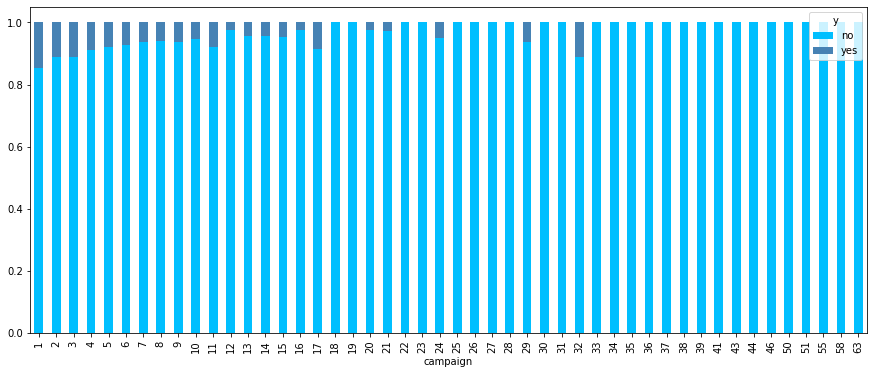

In [63]:
_ = pd.crosstab(data.campaign, data.y)
_.div(_.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 6))
plt.show()

## Pdays

In [64]:
# number of days that passed by after the client was last contacted from a previous campaign. 
# (numeric, -1 means client was not previously contacted)
data.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

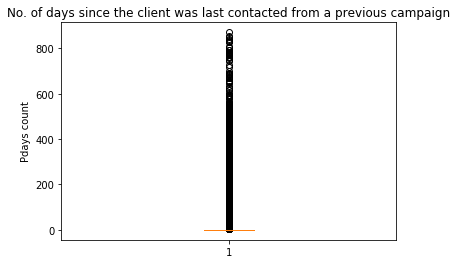

In [65]:
_ = plt.boxplot('pdays', data= data)
_ = plt.ylabel('Pdays count')
_ = plt.title('No. of days since the client was last contacted from a previous campaign')
plt.show()

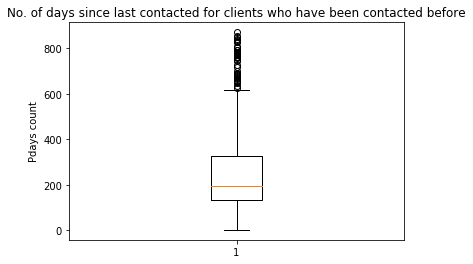

In [66]:
# Since there are 36954 entries that pertain to clients not being previously contacted,
# I want to plot the rest of the data other than -1
_ = plt.boxplot('pdays', data = data[data['pdays'] != -1])
_ = plt.ylabel('Pdays count')
_ = plt.title('No. of days since last contacted for clients who have been contacted before')
plt.show()

In [67]:
#Now, for this data with (pdays != -1) the outliers are pretty less and we can keep the outliers for further analysis.

## Previous

In [68]:
# number of contacts performed before this campaign and for this client 
data.previous.value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

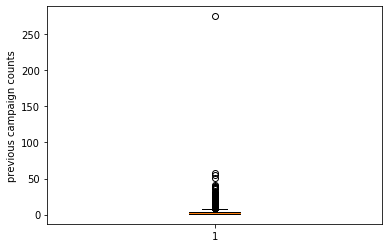

In [69]:
# previous = 275 could just be an outlier because everything else is in the range of 0 to 50. 
# 0 has too high data of 36954 counts. Boxplot for the data for data except 0.
_ = plt.boxplot('previous', data = data[data['previous'] != 0])
_ = plt.ylabel('previous campaign counts')
plt.show()

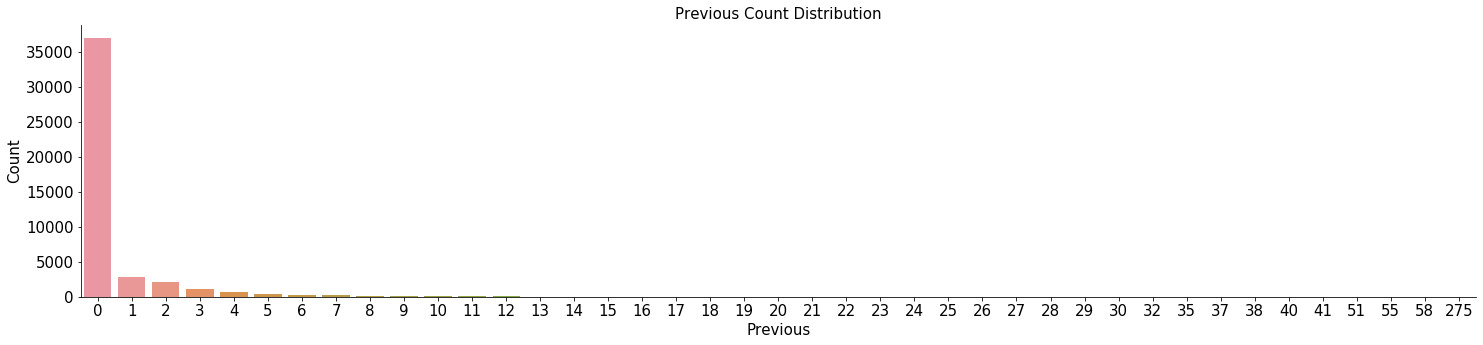

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
sns.countplot(x = 'previous', data = data)
ax.set_xlabel('Previous', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Previous Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

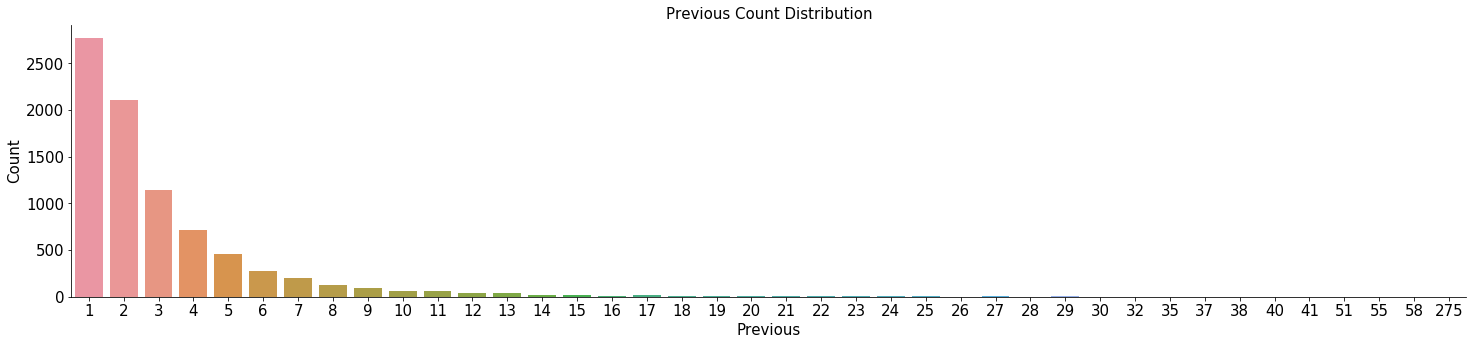

In [71]:
# Same plot with data excluding 0
fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
sns.countplot(x = 'previous', data = data[data['previous'] != 0])
ax.set_xlabel('Previous', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Previous Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

## poutcome

In [72]:
# outcome of the previous marketing campaign
data.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

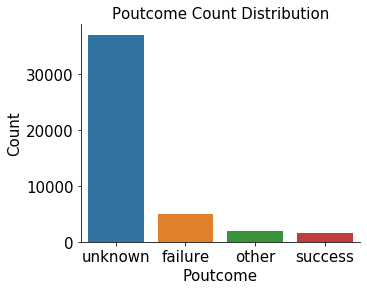

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 4)
sns.countplot(x = 'poutcome', data = data)
ax.set_xlabel('Poutcome', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Poutcome Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [74]:
# Unknown and other categories could be grouped into one column since they could both be the same
data['poutcome'] = data['poutcome'].replace(['other'] , 'unknown')
data.poutcome.value_counts()

unknown    38799
failure     4901
success     1511
Name: poutcome, dtype: int64

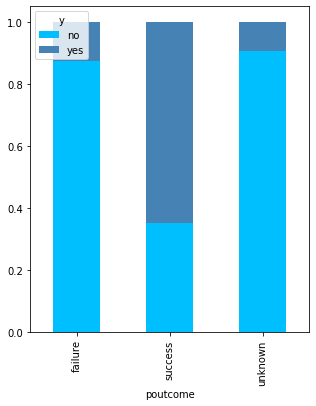

In [75]:
_ = pd.crosstab(data.poutcome, data.y)
_.div(_.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(5, 6))
plt.show()

## Categorical columns ->

In [76]:
data_cat = data.copy()

In [77]:
data_cat['job'].replace(['management', 'technician', 'entrepreneur', 'blue-collar' , 'unknown' , 'retired' , 'admin.' , 'services' , 'self-employed', 'unemployed', 'housemaid' , 'student'] , [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace=True)

data_cat['education'].replace(['tertiary', 'secondary', 'unknown', 'primary'], [0, 1, 2, 3], inplace=True)

data_cat['marital'].replace(['married', 'single', 'divorced'], [0, 1, 2], inplace=True)

data_cat['default'].replace(['no', 'yes'],[0, 1], inplace=True)

data_cat['housing'].replace(['no', 'yes'],[0, 1], inplace=True)

data_cat['loan'].replace(['no', 'yes'],[0, 1], inplace=True)

data_cat['contact'].replace(['unknown', 'cellular', 'telephone'],[0, 1, 2], inplace=True)

data_cat['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

data_cat['poutcome'].replace(['unknown', 'failure', 'success'],[0, 1, 2], inplace=True)

data_cat['y'].replace(['no', 'yes'],[0, 1], inplace=True)

In [78]:
#Age column is split into 4 categories 0, 1, 2, 3 done according to percentiles

#print(np.percentile(data.age, [0,25,50,75,100]))


#data.loc[data['age'] <= 33, 'age'] = 0
#data.loc[(data['age'] > 33) & (data['age'] <= 39), 'age'] = 1
#data.loc[(data['age'] > 39) & (data['age'] <= 48), 'age'] = 2
#data.loc[(data['age'] > 48), 'age'] = 3

#data.age.value_counts()

In [79]:
print("Jobs : ", data.job.unique())
print("Marital : ", data.marital.unique())
print("Education : ", data.education.unique())
print("Default : ", data.default.unique())
print("Housing : ", data.housing.unique())
print("Loans : ", data.loan.unique())
print("Contact : ", data.contact.unique())
print("Month : ", data.month.unique())
print("Poutcome : ", data.poutcome.unique())
print("y : ", data.y.unique())


Jobs :  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital :  ['married' 'single' 'divorced']
Education :  ['tertiary' 'secondary' 'unknown' 'primary']
Default :  ['no' 'yes']
Housing :  ['yes' 'no']
Loans :  ['no' 'yes']
Contact :  ['unknown' 'cellular' 'telephone']
Month :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Poutcome :  ['unknown' 'failure' 'success']
y :  ['no' 'yes']


In [80]:
data_cat.describe()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,3.526133,0.513238,1.049944,0.018027,1362.272058,0.555838,0.160226,0.776293,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323,0.175245,0.116985
std,10.618762,3.098343,0.692948,0.968986,0.133049,3044.765829,0.496878,0.366820,0.549747,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441,0.459762,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,0.000000,1.000000,0.000000,448.000000,1.000000,0.000000,1.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,48.000000,6.000000,1.000000,1.000000,0.000000,1428.000000,1.000000,0.000000,1.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000,2.000000,1.000000


In [81]:
corr = data_cat.corr()
corr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.004262,-0.126351,0.197850,-0.017879,0.097783,-0.185513,-0.015655,0.092577,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288,0.024445,0.025155
job,0.004262,1.000000,0.025000,0.259541,-0.007340,-0.029654,-0.041317,-0.012578,0.001588,-0.027535,-0.064629,0.008166,-0.035410,0.007492,-0.006466,0.009789,0.022396
marital,-0.126351,0.025000,1.000000,-0.109133,0.018404,-0.028172,-0.011671,-0.018526,-0.014290,-0.005217,-0.044321,0.018834,-0.029294,0.020832,0.006876,0.008721,0.043846
education,0.197850,0.259541,-0.109133,1.000000,0.008114,-0.048649,0.044788,0.002191,-0.068756,-0.024666,-0.061310,-0.003267,0.002234,-0.010713,-0.024818,-0.048394,-0.058675
default,-0.017879,-0.007340,0.018404,0.008114,1.000000,-0.066745,-0.006025,0.077234,-0.024095,0.009424,0.014989,-0.010021,0.016822,-0.029979,-0.018329,-0.036096,-0.022419
balance,0.097783,-0.029654,-0.028172,-0.048649,-0.066745,1.000000,-0.068768,-0.084350,0.047701,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674,0.035571,0.052838
housing,-0.185513,-0.041317,-0.011671,0.044788,-0.006025,-0.068768,1.000000,0.041323,-0.207722,-0.027982,-0.173887,0.005075,-0.023599,0.124178,0.037076,0.000784,-0.139173
loan,-0.015655,-0.012578,-0.018526,0.002191,0.077234,-0.084350,0.041323,1.000000,0.000058,0.011370,0.021638,-0.012412,0.009980,-0.022754,-0.011043,-0.043474,-0.068185
contact,0.092577,0.001588,-0.014290,-0.068756,-0.024095,0.047701,-0.207722,0.000058,1.000000,0.038643,0.167103,0.001494,0.020046,0.210651,0.139518,0.200091,0.130590
day,-0.009120,-0.027535,-0.005217,-0.024666,0.009424,0.004503,-0.027982,0.011370,0.038643,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710,-0.070162,-0.028348


In [123]:
corr_p = np.corrcoef(data_cat.values())
corr_p

TypeError: 'numpy.ndarray' object is not callable

array([[1.        , 0.22445065, 0.04830972, ..., 0.99661061, 0.85123573,
        0.99780804],
       [0.22445065, 1.        , 0.97543324, ..., 0.28762112, 0.69233502,
        0.21432187],
       [0.04830972, 0.97543324, 1.        , ..., 0.10788107, 0.53716746,
        0.03538942],
       ...,
       [0.99661061, 0.28762112, 0.10788107, ..., 1.        , 0.88603349,
        0.99650758],
       [0.85123573, 0.69233502, 0.53716746, ..., 0.88603349, 1.        ,
        0.84634295],
       [0.99780804, 0.21432187, 0.03538942, ..., 0.99650758, 0.84634295,
        1.        ]])

Text(0.5, 1, 'Heatmap of Correlation Matrix')

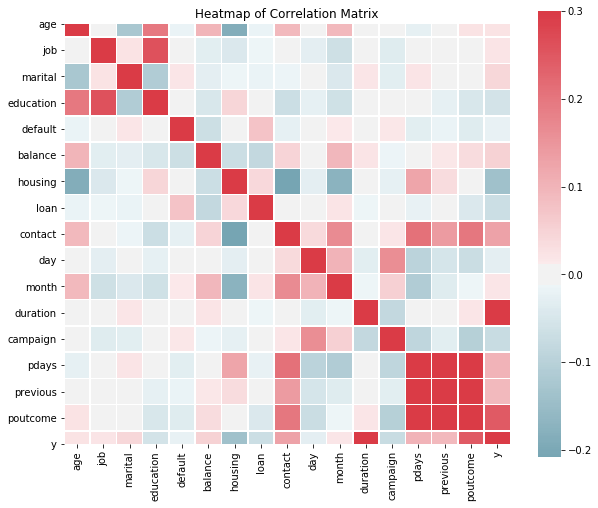

In [84]:
# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')